In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tflearn
import scipy;
from scipy import ndimage
%matplotlib inline

In [2]:
o = pd.read_csv("info.txt",delimiter=' ');

In [3]:
print (os.getcwd())
images = os.listdir("./input");

train_size = len(images)

APPROX = 10;
count = 0
pixel = 1024;

train_data_X = np.zeros((train_size,pixel,pixel),dtype=np.float32)
train_data_Y = np.zeros((train_size,1),dtype=np.float32)

for i in images:
    img = np.array(plt.imread('./input/'+i),dtype=np.float32);
    train_data_X[count]=img/img.max();
    if np.all(o[o.Ref == i[:-4]].severity=='B'):
        train_data_Y[count]=1;
    else:
        train_data_Y[count]=0;
    count = count+1;

print (train_data_X.shape)
print (train_data_Y.shape)

/notebooks/project/pandas/BC
(322, 1024, 1024)
(322, 1)


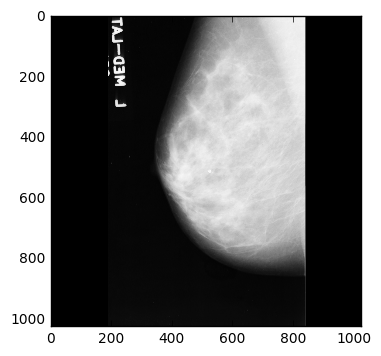

[ 0.]


In [4]:
plt.imshow(train_data_X[4],cmap='gray')
plt.show();
print train_data_Y[4]

In [5]:
train_size = 300;
X_train = train_data_X[0:train_size].reshape(train_size,(pixel*pixel));
y_train = train_data_Y[0:train_size]
X_test = train_data_X[train_size:].reshape(train_data_X.shape[0]-train_size,(pixel*pixel));
y_test = train_data_Y[train_size:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1048576)
(300, 1)
(22, 1048576)
(22, 1)


In [6]:
image_size = 1024
num_labels = 1
num_steps = 500
batch_size = 50
def initNN():
    Weight = tf.Variable(tf.zeros([image_size*image_size , num_labels]),dtype=tf.float32)
    Weight1 = tf.Variable(tf.zeros([784 , num_labels]),dtype=tf.float32)
    Weight2 = tf.Variable(tf.zeros([num_labels , num_labels]),dtype=tf.float32)
    bias = tf.Variable(tf.zeros([num_labels]),dtype=tf.float32)
    bias1 = tf.Variable(tf.zeros([num_labels]),dtype=tf.float32)
    bias2 = tf.Variable(tf.zeros([num_labels]),dtype=tf.float32)
    return [Weight,bias,Weight1,bias2,Weight2,bias2]
def forwardNN(X,W):   
    H = tf.matmul(X,W[0])+W[1];
    #H = tf.nn.relu(H)
    #H1 = tf.matmul(H,W[2])+W[3];
    #H1 = tf.nn.relu(H1)
    #H2 = tf.matmul(H1,W[4])+W[5];
    return H

graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32,[None,image_size*image_size])
    y = tf.placeholder(tf.float32,[None,1])
    W = initNN()
    H2 = forwardNN(X,W)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(H2,y))
    optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    train_prediction = (H2)
    valid_prediction = tf.nn.softmax(forwardNN(X_test,W))
    #test_prediction =(forwardNN(X_test,W))

In [7]:
def accuracy1(predictions, labels):
    eq = (np.argmax(predictions, 1) == np.argmax(labels, 1))
    return ((100.0 * np.sum(eq))/eq.size)
def accuracy(predictions, labels):
    eq = (predictions == labels)
    print(predictions.shape,labels.shape)
    return ((100.0 * np.sum(eq))/eq.size)
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        offset = (step * batch_size) % (X_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        feed_dict = {X : batch_data, y : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
        if (step % 100 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("mini batch accuracy: ", accuracy(predictions, batch_labels))            
            print("Validation accuracy: ", accuracy(valid_prediction.eval(), y_test))
    #print("Test accuracy: ",accuracy(test_prediction.eval(), y_test))
    img_val = (W[0].eval())
    img_val = img_val.transpose()
    plt.imshow(img_val.reshape(image_size,image_size));
    plt.show()

Initialized
Minibatch loss at step 0: 0.000000
((50, 1), (50, 1))
('mini batch accuracy: ', 76.0)
((22, 1), (22, 1))
('Validation accuracy: ', 27.272727272727273)


KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import KMeans;
cluster = KMeans(n_clusters=2).fit(X_train)
res = KMeans.predict(X_test);
